In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import urllib.request
import keras as k


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

file_name = "data.csv"

if not os.path.exists(file_name):
    # Fetch the data file from the UCI repository if it isn't present
    urllib.request.urlretrieve(url, file_name)
    print("Data file downloaded!")

else:
    print("Data file already present.")

Data file already present.


### Analyze Data (and create dataframe)


In [3]:

def analyze(data):
    
  # View features in the data
  print("Features")
  print(data.columns.values)
  print("-" * 70)
    
  # View the details the features in the data (data type, non-null count, memory usage etc.)
  print("Feature Details")
  print(data.info())
  print("-" * 70)
    
  # View distribution of numerical features across the data set (statistical summary)
  print("Numerical Features")
  print(data.describe())
  print("-" * 70) 
    
  # View distribution of categorical features across the data setIt means
  print("Categorical Features")
  print(data.describe(include=['O']))
  print("-" * 70)

  #We use the = * n to make a seperation between each of the sections of analyzing)

In [4]:
column_names = ['id_number', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Load the data

df = pd.read_csv('data.csv', names=column_names)
df.head()


,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
analyze(df)

Features
['id_number' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave_points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave_points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave_points_worst' 'symmetry_worst' 'fractal_dimension_worst']
----------------------------------------------------------------------
Feature Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_number                569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 n

### Data Preprocessing and Visualization

In [6]:
df.drop('id_number', axis=1, inplace=True)
df["diagnosis"].replace({"M": 1, "B": 0}, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


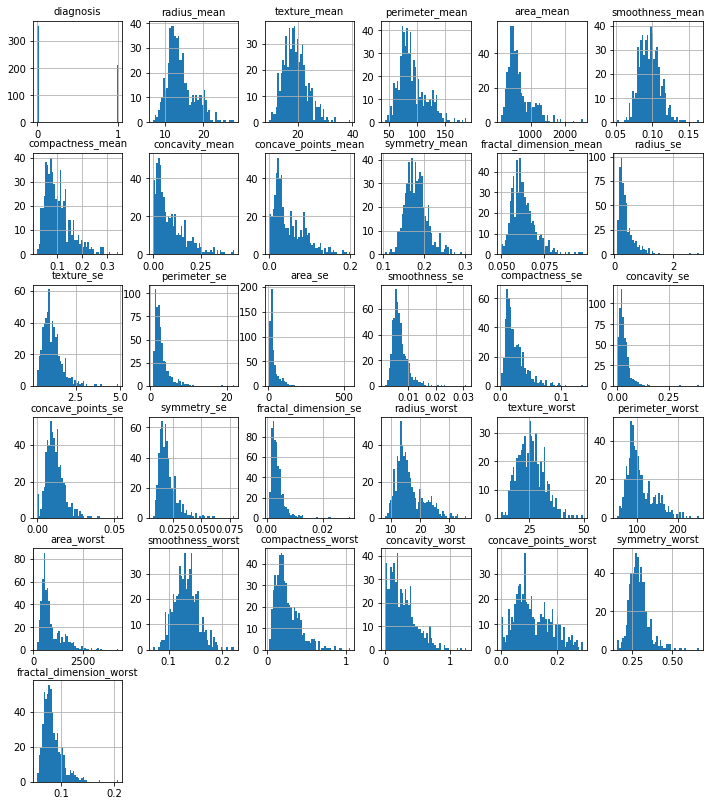

In [10]:
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 14))

plt.show()

### Form 80/20 Training and Test Datasets

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

prediction_vars = prediction_vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

train_x = train[prediction_vars]
train_y = train['diagnosis']

test_x = test[prediction_vars]
test_y = test['diagnosis']

### Create an Artificial Neural Network

In [12]:
model = k.Sequential([
    tf.keras.Input(shape=(27,)),
    k.layers.Dense(25, activation='relu'),
    k.layers.Dense(15, activation='relu'),
    k.layers.Dense(10, activation='relu'),
    k.layers.Dense(1, activation='sigmoid')
])

In [13]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                700       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.optimizers import Adam

tf.random.set_seed(42)


optimizer = Adam(learning_rate=0.001)


model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']

)

history = model.fit(
    train_x, train_y,
    epochs=100,
)




Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 4.9102 - accuracy: 0.3714
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.6967
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8418
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8813
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.9077
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.9011
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.9033
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.9055
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.9121
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.8989
Epoch 11/

In [15]:
y_hat = [1 if y>=0.5 else 0 for y in model.predict(test_x)]
print(y_hat)

4/4 [==============================] - 0s 1ms/step
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]


### View the Confusion Matrix and Accuracy

In [16]:
#Check the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_hat)
print(cm)

[[71  0]
 [ 4 39]]


<AxesSubplot:>

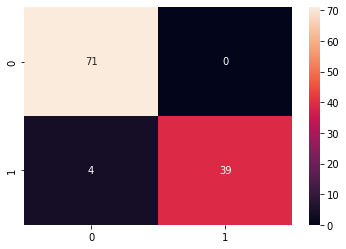

In [17]:
#Make a heatmap

import seaborn as sns

sns.heatmap(cm, annot=True)

In [18]:
#Finally check accuracy

from sklearn.metrics import accuracy_score

print(f"{accuracy_score(test_y, y_hat) * 100}%") 

#Accuracy = (TruePositive + TrueNegative) / (TruePositive + TrueNegative + FalsePositive + FalseNegative)

96.49122807017544%


In [19]:
cm_accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(cm_accuracy*100)+"%")

#As you see the exact same when done manually through the CM

Accuracy: 96.49122807017544%


### Check the workflow of the ANN

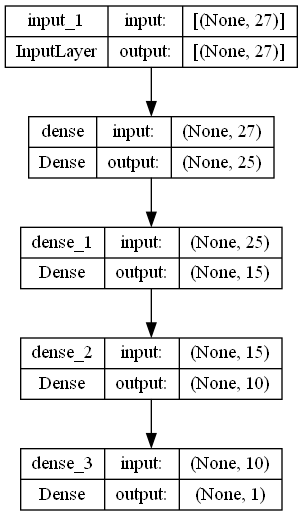

In [20]:
from keras.utils import plot_model 

#If you were to put this on your machine, make sure to have graphviz and pydot installed and added to your path to be able to use this visualizer



plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

### CODE COMPLETE :)